In [61]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [62]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


In [63]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
transform = transforms.ToTensor()

In [65]:
train_data = datasets.MNIST(root=r'C:\terme 8\Udemy.PyTorch.for.Deep.Learning.with.Python.Bootcamp_p30download.com\13 . trains\pytorch\2. ANN\data', train= True, download= True, transform=transform)

In [66]:
test_data = datasets.MNIST(root=r'C:\terme 8\Udemy.PyTorch.for.Deep.Learning.with.Python.Bootcamp_p30download.com\13 . trains\pytorch\2. ANN\data', train=False, transform=transform)

In [67]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: C:\terme 8\Udemy.PyTorch.for.Deep.Learning.with.Python.Bootcamp_p30download.com\13 . trains\pytorch\2. ANN\data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [68]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: C:\terme 8\Udemy.PyTorch.for.Deep.Learning.with.Python.Bootcamp_p30download.com\13 . trains\pytorch\2. ANN\data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [69]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [70]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [71]:
image, label = train_data[0]

In [72]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [73]:
label

5

In [74]:
image.shape

torch.Size([1, 28, 28])

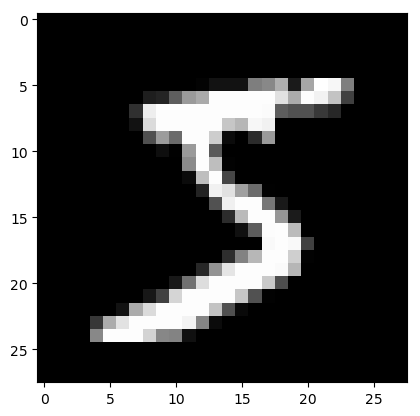

In [75]:
plt.imshow(image.reshape((28, 28)), cmap= 'gray' )

In [76]:
torch.manual_seed(101)

train_loader = DataLoader(train_data, batch_size=100, shuffle= True)
test_loader = DataLoader(test_data, batch_size=500, shuffle= False)

In [77]:
class MultilayerPerceptron(nn.Module):
    def __init__(self, in_sz=784, out_sz=10, layers=[120,84]):
        super().__init__()
        self.fc1 = nn.Linear(in_sz,layers[0])
        self.fc2 = nn.Linear(layers[0],layers[1])
        self.fc3 = nn.Linear(layers[1],out_sz)
    
    def forward(self,X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)
        
        
        

In [78]:
torch.manual_seed(101)

model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [79]:
creterion =nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr= 0.001 )

In [80]:
import time
start_time = time.time()

epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = model(X_train.view(100, -1))  # Here we flatten X_train
        loss = creterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test.view(500, -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = creterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed            

epoch:  0  batch:  200 [ 20000/60000]  loss: 0.28055406  accuracy:  83.040%
epoch:  0  batch:  400 [ 40000/60000]  loss: 0.20303488  accuracy:  87.325%
epoch:  0  batch:  600 [ 60000/60000]  loss: 0.20227624  accuracy:  89.323%
epoch:  1  batch:  200 [ 20000/60000]  loss: 0.14457071  accuracy:  94.560%
epoch:  1  batch:  400 [ 40000/60000]  loss: 0.10489678  accuracy:  95.110%
epoch:  1  batch:  600 [ 60000/60000]  loss: 0.12034717  accuracy:  95.347%
epoch:  2  batch:  200 [ 20000/60000]  loss: 0.11627224  accuracy:  96.530%
epoch:  2  batch:  400 [ 40000/60000]  loss: 0.08906287  accuracy:  96.615%
epoch:  2  batch:  600 [ 60000/60000]  loss: 0.10235453  accuracy:  96.740%
epoch:  3  batch:  200 [ 20000/60000]  loss: 0.05358915  accuracy:  97.475%
epoch:  3  batch:  400 [ 40000/60000]  loss: 0.05405061  accuracy:  97.475%
epoch:  3  batch:  600 [ 60000/60000]  loss: 0.05676334  accuracy:  97.513%
epoch:  4  batch:  200 [ 20000/60000]  loss: 0.13540547  accuracy:  97.945%
epoch:  4  b

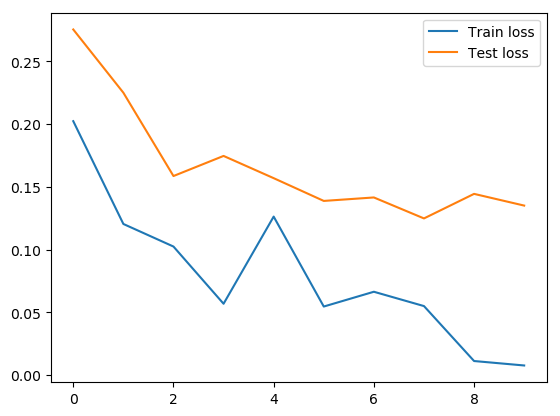

In [84]:
plt.plot(train_losses, label= "Train loss")
plt.plot(test_losses, label= "Test loss")
plt.legend()

In [86]:
train_acc=[t/600 for t in train_correct]

In [87]:
train_acc

[tensor(89),
 tensor(95),
 tensor(96),
 tensor(97),
 tensor(98),
 tensor(98),
 tensor(98),
 tensor(98),
 tensor(99),
 tensor(99)]

In [88]:
test_load = DataLoader(test_data, batch_size=10000, shuffle=False)


In [ ]:
with torch.no_grad():
    correct = 0
    
    for X_test, y_test in test_load:
        y_val = model(X_test.view(len(X_test), -1))
        predicted = torch.max(y_val, 1)[1]
        